#### U3 L5 Project1: 
###### The purpose of this project is to compare regents exam scores between Townsend Harris High School and schools in all boroughs.
###### Townsend Harris High School students outperformed all schools in all boroughs.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import panda as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib inline

#### Load Data

In [2]:
#load data
df_raw = pd.read_csv("flatfiles/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv", low_memory=False)
df_demo_raw = pd.read_csv("flatfiles/2017_DOE_High_School_Directory.csv", low_memory=False)

#### Clean Columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

Index(['dbn', 'school_name', 'boro', 'overview_paragraph', 'school_10th_seats',
       'academicopportunities1', 'academicopportunities2',
       'academicopportunities3', 'academicopportunities4',
       'academicopportunities5',
       ...
       'state_code', 'latitude', 'longitude', 'community_board',
       'council_district', 'census_tract', 'bin', 'bbl', 'nta', 'borough'],
      dtype='object', length=462)

school_dbn                      0
school_name                     0
school_level                    0
regents_exam                   10
year                            0
total_tested                    0
mean_score                      0
number_scoring_below_65         0
percent_scoring_below_65        0
number_scoring_65_or_above      0
percent_scoring_65_or_above     0
number_scoring_80_or_above      0
percent_scoring_80_or_above     0
number_scoring_cr               0
percent_scoring_cr              0
dtype: int64

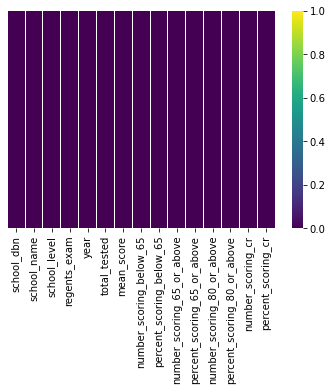

In [33]:
df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')
df_demo_raw.columns = df_demo_raw.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')

df_raw.columns
df_demo_raw.columns

df_raw.isnull().sum()
sns.heatmap(df_raw.isnull(), yticklabels=False, cmap="viridis")

In [ ]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

df_demo_raw.borough = df_demo_raw.borough.apply(remove_whitespace)

#### Data Exploration and Wrangling

In [44]:
#pull the data where all do not have'mean_score' = 's' and 'school_name' = 'Townsend Harris High School'
df_set_exempt = df_raw[df_raw['mean_score'] == 's'] # dataset with exams that have s 
df_set_raw = df_raw[df_raw['mean_score'] != 's']# dataset without exams that have s 

#converting df_set_raw columns to numeric

df_set_raw = df_set_raw.astype({'mean_score': 'float64','number_scoring_below_65': 'int64','percent_scoring_below_65': 'float64','number_scoring_65_or_above': 'int64','percent_scoring_65_or_above': 'float64','number_scoring_80_or_above': 'int64','percent_scoring_80_or_above': 'float64'})

df_set1 = df_set_raw[df_set_raw['school_name'] != 'Townsend Harris High School'] # data set with all schools
df_set_all = df_set_raw[df_set_raw['school_name'] != 'Townsend Harris High School'] # data set with all schools
df_set_th = df_set_raw[df_set_raw['school_name'] == 'Townsend Harris High School'] # 'Townsend Harris High School' data set 

print(df_set_raw.dtypes)

df_set_all.describe()
df_set_th.describe()

school_dbn                      object
school_name                     object
school_level                    object
regents_exam                    object
year                             int64
total_tested                     int64
mean_score                     float64
number_scoring_below_65          int64
percent_scoring_below_65       float64
number_scoring_65_or_above       int64
percent_scoring_65_or_above    float64
number_scoring_80_or_above       int64
percent_scoring_80_or_above    float64
number_scoring_cr               object
percent_scoring_cr              object
dtype: object


,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above
count,136802.000000,136802.000000,136802.000000,136802.000000,136802.000000,136802.000000,136802.000000,136802.000000,136802.000000
mean,2015.957464,71.509532,65.945786,25.194888,42.024151,46.314645,57.977339,20.339213,22.546026
std,0.809261,107.849529,11.242486,37.178885,28.372407,85.121164,28.372191,56.099384,25.995346
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,18.000000,58.300000,5.000000,17.600000,8.000000,35.900000,1.000000,2.200000
50%,2016.000000,39.000000,65.400000,13.000000,40.400000,21.000000,59.600000,5.000000,12.500000
75%,2017.000000,82.000000,73.400000,31.000000,64.100000,52.000000,82.400000,18.000000,34.200000
max,2017.000000,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000


,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,2016.006515,104.684039,89.696743,0.814332,1.597394,103.869707,98.402606,95.120521,87.751140
std,0.820463,95.410985,5.524324,1.692367,4.422491,94.797458,4.422491,87.991765,17.113539
min,2015.000000,6.000000,68.000000,0.000000,0.000000,4.000000,57.100000,0.000000,0.000000
25%,2015.000000,22.000000,87.400000,0.000000,0.000000,22.000000,98.700000,20.000000,84.550000
50%,2016.000000,66.000000,90.800000,0.000000,0.000000,65.000000,100.000000,57.000000,93.800000
75%,2017.000000,184.500000,93.900000,1.000000,1.300000,182.500000,100.000000,168.000000,99.400000
max,2017.000000,315.000000,97.600000,11.000000,42.900000,308.000000,100.000000,285.000000,100.000000


In [45]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

df_demo_raw.borough = df_demo_raw.borough.apply(remove_whitespace)

#### Data wrangling and  Data Visualization 

In [46]:
#pivot for All School
df_set_all_pivot = pd.pivot_table(df_set_all, values='mean_score', index=['regents_exam'], 
                                  columns=['year'], aggfunc=np.mean, fill_value=0)
df_set_all_pivot.reset_index(inplace=True)
df_set_all_pivot = df_set_all_pivot.set_index('regents_exam')
print('Exam Avg Score: All School')
df_set_all_pivot

#pivot for 'Townsend Harris High School'
df_set_th_pivot  = pd.pivot_table(df_set_th, values='mean_score', index=['regents_exam'], 
                                  columns=['year'], aggfunc=np.mean, fill_value=0)
df_set_th_pivot.reset_index(inplace=True)
df_set_th_pivot = df_set_th_pivot.set_index('regents_exam')
print('Exam Avg Score: Townsend Harris High School')
df_set_th_pivot

#df_set_all_pivot['Type'] = 
#df_set_th_pivot['Type'] = 



Exam Avg Score: All School


year,2015,2016,2017
regents_exam,,,
Algebra2/Trigonometry,57.165101,56.230590,52.847756
Common Core Algebra,63.150452,68.653734,69.936625
Common Core Algebra2,0.000000,62.286681,64.445112
Common Core English,70.127791,70.985279,69.814025
Common Core Geometry,58.875746,57.844312,60.217106
English,68.662884,59.400419,0.000000
Geometry,63.498792,56.363973,0.000000
Global History and Geography,64.190004,64.026860,64.103262
Integrated Algebra,65.057996,64.312368,0.000000


Exam Avg Score: Townsend Harris High School


year,2015,2016,2017
regents_exam,,,
Algebra2/Trigonometry,90.612500,93.010000,0.000000
Common Core Algebra,78.085714,87.130000,89.150000
Common Core Algebra2,0.000000,79.000000,85.975000
Common Core English,95.377778,95.033333,93.516667
Common Core Geometry,88.030000,85.230000,86.516667
English,91.800000,0.000000,0.000000
Geometry,93.210000,0.000000,0.000000
Global History and Geography,94.755556,93.258333,92.700000
Integrated Algebra,87.200000,0.000000,0.000000


Exam Avg Score: All School


year,2015,2016,2017
regents_exam,,,
Algebra2/Trigonometry,57.165101,56.230590,52.847756
Common Core Algebra,63.150452,68.653734,69.936625
Common Core Algebra2,0.000000,62.286681,64.445112
Common Core English,70.127791,70.985279,69.814025
Common Core Geometry,58.875746,57.844312,60.217106
English,68.662884,59.400419,0.000000
Geometry,63.498792,56.363973,0.000000
Global History and Geography,64.190004,64.026860,64.103262
Integrated Algebra,65.057996,64.312368,0.000000


Text(0.5, 0, 'regents_exam')

Text(0, 0.5, 'score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

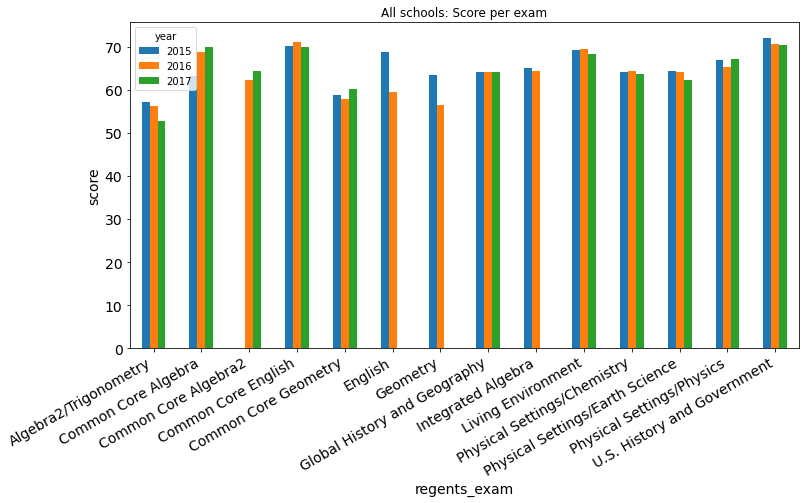

In [47]:
#Chart for all schools
print('Exam Avg Score: All School')
df_set_all_pivot

ax = df_set_all_pivot[[2015,2016,2017]].plot(kind='bar', title ="All schools: Score per exam", figsize=(12, 6), legend=True, fontsize=14)
ax.set_xlabel("regents_exam", fontsize=14)
ax.set_ylabel("score", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.savefig('images/all_schools.jpg', dpi=400, bbox_inches='tight')
plt.show()



Text(0.5, 0, 'regents_exam')

Text(0, 0.5, 'score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

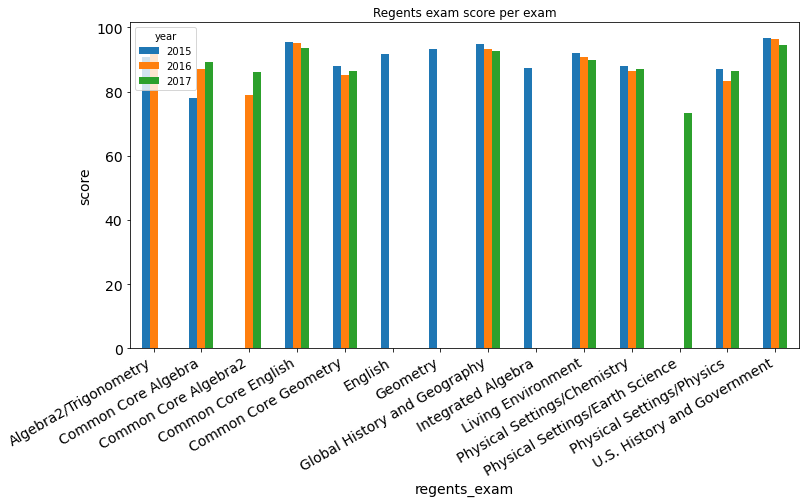

In [48]:
#Chart for 'Townsend Harris High School'
ax = df_set_th_pivot[[2015,2016,2017]].plot(kind='bar', title ="Regents exam score per exam", figsize=(12, 6), legend=True, fontsize=14)
ax.set_xlabel("regents_exam", fontsize=14)
ax.set_ylabel("score", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.savefig('images/TownsendHarrisHighSchool.jpg', dpi=1200, bbox_inches='tight')
plt.show()

### Average Regents Score per Year:  Townsend Harris High School vs All Schools

,Score: for All Schools,Score: Townsend Harris High School
year,,
2015,65.667863,90.903922
2016,65.596691,88.870297
2017,66.652459,89.315385


Text(0.5, 0, 'Year')

Text(0, 0.5, 'score')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

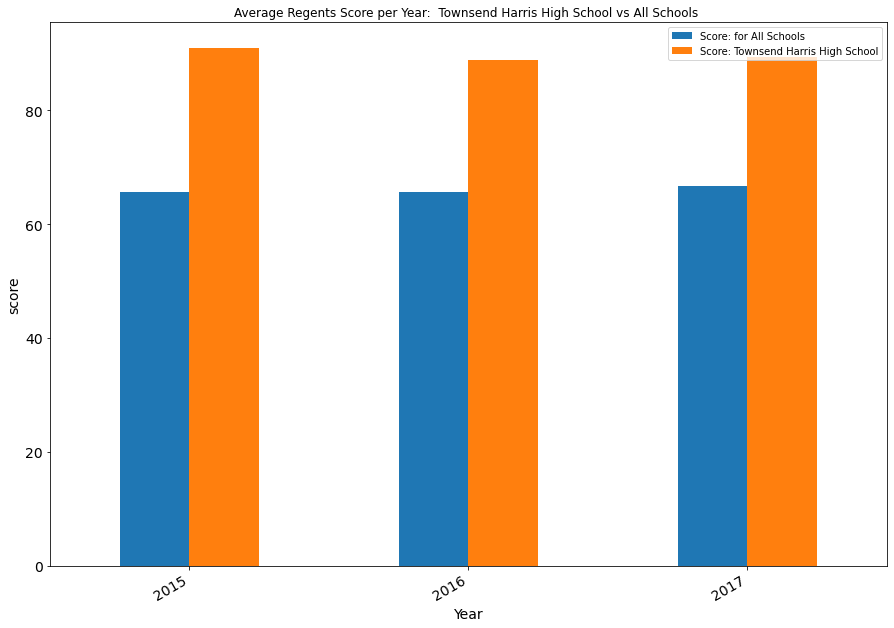

In [49]:
#Create new dataFrames for Average Regents Score per Year:  Townsend Harris High School vs All Schools
test1 = df_set_all.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'Score: for All Schools'})
test2 = df_set_th.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'Score: Townsend Harris High School'})

test4 = pd.merge(test1, test2, how='left', on='year')
test4 = test4.set_index('year')
test4 

#visualization for Average Regents Score per Year:  Townsend Harris High School vs All Schools
ax = test4[['Score: for All Schools','Score: Townsend Harris High School']].plot(kind='bar', title ="Average Regents Score per Year:  Townsend Harris High School vs All Schools ", figsize=(15, 10), legend=True, fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("score", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.show()

### Average Total Regents Score per Year: Townsend Harris High School vs All Boro

In [55]:
#create DataFrames for Average Total Regents Score per Year: Townsend Harris High School vs All Boro
df_set_all_scores = df_set_all[['school_dbn', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr']]

df_set_all_scores_demo = df_set_all_scores.join(df_demo_raw.set_index('dbn'), on='school_dbn'  )
df_set_all_queens = df_set_all_scores_demo[df_set_all_scores_demo['borough'] == 'QUEENS']
df_set_all_bklyn = df_set_all_scores_demo[df_set_all_scores_demo['borough'] == 'BROOKLYN']
df_set_all_bx = df_set_all_scores_demo[df_set_all_scores_demo['borough'] == 'BRONX']
df_set_all_man = df_set_all_scores_demo[df_set_all_scores_demo['borough'] == 'MANHATTAN']
df_set_all_si = df_set_all_scores_demo[df_set_all_scores_demo['borough'] == 'STATENIS']


df_qu = df_set_all_queens.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'All Schools in Queens'})
df_bk = df_set_all_bklyn.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'All Schools in Brooklyn'})
df_bx = df_set_all_bx.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'All Schools in Bronx'})
df_ma = df_set_all_man.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'All Schools in Manhattan'})
df_si = df_set_all_si.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'All Schools in Staten Island'})

th_scores = df_set_th.groupby('year', as_index=False)['mean_score'].mean().rename(columns={'mean_score':'Townsend Harris High School'})

table = pd.merge(th_scores, df_qu, how='left', on='year')
table = table.set_index('year')
table = pd.merge(table, df_bk, how='left', on='year')
table = table.set_index('year')
table = pd.merge(table, df_bx, how='left', on='year')
table = table.set_index('year')
table = pd.merge(table, df_ma, how='left', on='year')
table = table.set_index('year')
table = pd.merge(table, df_si, how='left', on='year')
table = table.set_index('year')

,Townsend Harris High School,All Schools in Queens,All Schools in Brooklyn,All Schools in Bronx,All Schools in Manhattan,All Schools in Staten Island
year,,,,,,
2015,90.903922,67.541563,63.792708,62.430990,67.446016,67.276650
2016,88.870297,67.190465,63.234718,61.945064,67.174076,66.504305
2017,89.315385,68.097061,63.987765,62.589515,68.267228,68.931390


Text(0.5, 0, 'Year')

Text(0, 0.5, 'score')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

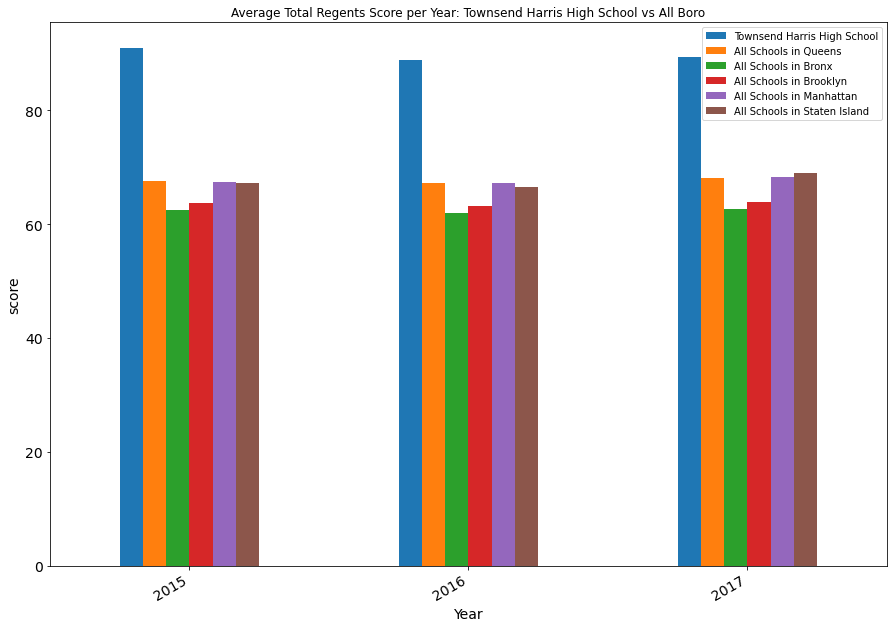

In [56]:
#create DataFrames for Average Total Regents Score per Year: Townsend Harris High School vs All Boro
table
ax = table[['Townsend Harris High School','All Schools in Queens','All Schools in Bronx','All Schools in Brooklyn','All Schools in Manhattan','All Schools in Staten Island']].plot(kind='bar', 
title ="Average Total Regents Score per Year: Townsend Harris High School vs All Boro", figsize=(15, 10), legend=True, fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("score", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.show()

###### The purpose of this project is to compare regents exam scores between Townsend Harris High School and schools in all boroughs.
###### Townsend Harris High School students outperformed all schools in all boroughs.